In [1]:
import pandas as pd
df_jobs = pd.read_csv('/content/placement.csv')
print(df_jobs.head())


         Job Title       Job Location Job Time Zone        Consultant Name  \
0              SAP        Austin, TX            CST     Asghar N. Siddiqui   
1         Big Data        Dallas, TX            CST  Raman P Shanthirangam   
2  DevOps Engineer       San Jose, CA           PST      Raghuveer Bapuram   
3  DevOps Engineer  New York City, NY           EST          Peter R. Genz   
4         Big Data        Austin, TX            CST    Mr. Anand K Chiluka   

         Visa Consultant Location Consultant Time Zone Salary ($1000)  \
0         H1B        Bellmore, NY                  EST          $110K   
1  US Citizen      Coppell, Texas                  CST          $170K   
2  Green Card           NewJersey                  EST          $160K   
3  US Citizen        Freehold, NJ                  EST          $180K   
4         H1B        Milpitas, CA                  PST          $140K   

  Relocation Submission Date Joining Date Interview Status Hired  
0        Yes      02-01-2

In [2]:
print(df_jobs.info())
print(df_jobs.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Job Title             439 non-null    object
 1   Job Location          439 non-null    object
 2   Job Time Zone         439 non-null    object
 3   Consultant Name       439 non-null    object
 4   Visa                  439 non-null    object
 5   Consultant Location   439 non-null    object
 6   Consultant Time Zone  439 non-null    object
 7   Salary ($1000)        439 non-null    object
 8   Relocation            436 non-null    object
 9   Submission Date       439 non-null    object
 10  Joining Date          439 non-null    object
 11  Interview Status      439 non-null    object
 12  Hired                 439 non-null    object
dtypes: object(13)
memory usage: 44.7+ KB
None
             Job Title Job Location Job Time Zone Consultant Name        Visa  \
count            

In [3]:
df_jobs.isnull().sum()

,0
Job Title,0
Job Location,0
Job Time Zone,0
Consultant Name,0
Visa,0
Consultant Location,0
Consultant Time Zone,0
Salary ($1000),0
Relocation,3
Submission Date,0


In [4]:
df_jobs.dropna(subset=['Relocation'], inplace=True)

Handling Missing vlues and dropping columns which has null values

In [5]:
df_jobs['Salary ($1000)'] = df_jobs['Salary ($1000)'].replace('[\$,]', '', regex=True)

df_jobs['Salary ($1000)'] = pd.to_numeric(df_jobs['Salary ($1000)'], errors='coerce')

print(df_jobs['Salary ($1000)'].isnull().sum())

Q1 = df_jobs['Salary ($1000)'].quantile(0.25)
Q3 = df_jobs['Salary ($1000)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_jobs = df_jobs[(df_jobs['Salary ($1000)'] >= lower_bound) & (df_jobs['Salary ($1000)'] <= upper_bound)]

432


Removing extreme salary values that can impact the overall analysis of job market trends.

In [6]:
df_jobs['Job Title'] = df_jobs['Job Title'].str.lower().str.strip()

df_jobs['Job Title'].replace({'software engr': 'software engineer', 'sr. data analyst': 'senior data analyst'}, inplace=True)

<ipython-input-6-d428e68922f4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_jobs['Job Title'].replace({'software engr': 'software engineer', 'sr. data analyst': 'senior data analyst'}, inplace=True)


# **Data Analysis**

In [7]:
# Average salary across all jobs
average_salary = df_jobs['Salary ($1000)'].mean()
print(f"Average Salary: ${average_salary:.2f}k")

# Top 5 job titles
top_job_titles = df_jobs['Job Title'].value_counts().head(5)
print("Top 5 Job Titles:\n", top_job_titles)

# Top 5 locations with the most jobs
top_locations = df_jobs['Job Location'].value_counts().head(5)
print("Top 5 Job Locations:\n", top_locations)


Average Salary: $158.75k
Top 5 Job Titles:
 Job Title
cloud engineer    1
ios developer     1
java developer    1
python            1
Name: count, dtype: int64
Top 5 Job Locations:
 Job Location
Chicago, IL     2
Trenton, NJ     1
San Jose, CA    1
Name: count, dtype: int64


In [8]:
avg_salary_by_title = df_jobs.groupby('Job Title')['Salary ($1000)'].mean().sort_values(ascending=False)
print("Average Salary by Job Title:\n", avg_salary_by_title.head(10))

# Group by location and calculate average salary
avg_salary_by_location = df_jobs.groupby('Job Location')['Salary ($1000)'].mean().sort_values(ascending=False)
print("Average Salary by Location:\n", avg_salary_by_location.head(10))

# Group by visa type and calculate average salary
avg_salary_by_visa = df_jobs.groupby('Visa')['Salary ($1000)'].mean().sort_values(ascending=False)
print("Average Salary by Visa Type:\n", avg_salary_by_visa)

Average Salary by Job Title:
 Job Title
cloud engineer    185.0
ios developer     185.0
python            145.0
java developer    120.0
Name: Salary ($1000), dtype: float64
Average Salary by Location:
 Job Location
Chicago, IL     185.0
San Jose, CA    145.0
Trenton, NJ     120.0
Name: Salary ($1000), dtype: float64
Average Salary by Visa Type:
 Visa
US Citizen    158.75
Name: Salary ($1000), dtype: float64


In [9]:
hiring_counts = df_jobs['Hired'].value_counts()
print("Hiring Status:\n", hiring_counts)

# Calculate hiring rate
hiring_rate = (hiring_counts['Y'] / hiring_counts.sum()) * 100
print(f"Hiring Rate: {hiring_rate:.2f}%")

Hiring Status:
 Hired
Y    3
N    1
Name: count, dtype: int64
Hiring Rate: 75.00%


# **Data Visualisation**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-11-8b5199366b05>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_location_counts.index, y=job_location_counts.values, palette='coolwarm')


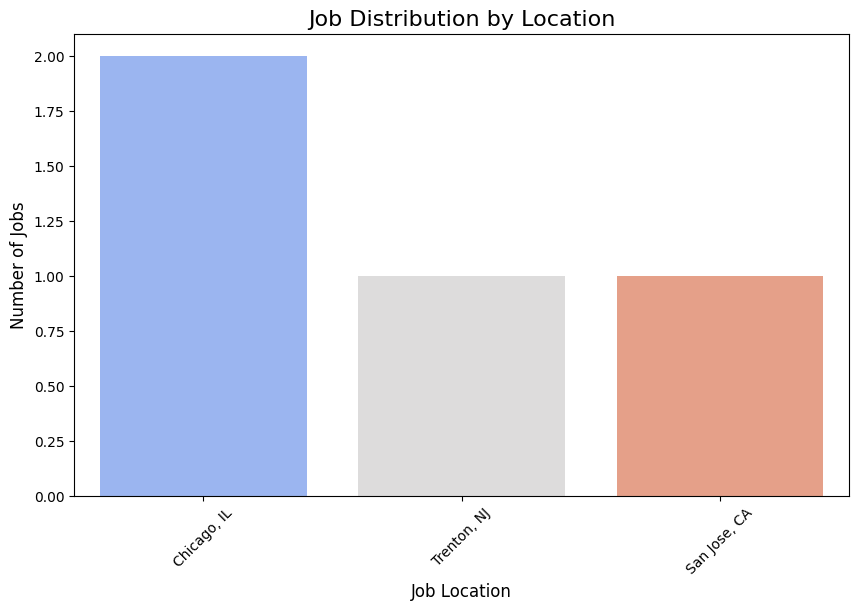

In [11]:
job_location_counts = df_jobs['Job Location'].value_counts().head(10)  # Top 10 locations for simplicity

# Create a bar plot for job distribution by location
plt.figure(figsize=(10, 6))
sns.barplot(x=job_location_counts.index, y=job_location_counts.values, palette='coolwarm')
plt.title('Job Distribution by Location', fontsize=16)
plt.xlabel('Job Location', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-12-2cc519c218b4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Job Title', y='Salary ($1000)', data=df_top_jobs, palette='coolwarm', estimator='mean')


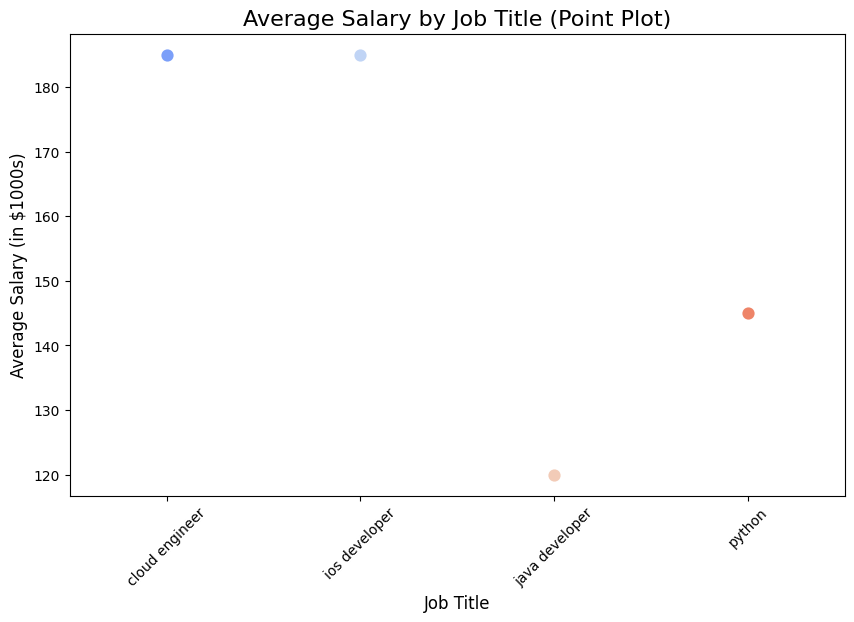

In [12]:
top_job_titles = df_jobs['Job Title'].value_counts().index[:5]
df_top_jobs = df_jobs[df_jobs['Job Title'].isin(top_job_titles)]

plt.figure(figsize=(10, 6))
sns.pointplot(x='Job Title', y='Salary ($1000)', data=df_top_jobs, palette='coolwarm', estimator='mean')
plt.title('Average Salary by Job Title (Point Plot)', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Average Salary (in $1000s)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-13-4e041958c10a>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_jobs['Submission Date'] = pd.to_datetime(df_jobs['Submission Date'])
<ipython-input-13-4e041958c10a>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_jobs.set_index('Submission Date').resample('M').size().plot(kind='line', marker='o', color='purple')


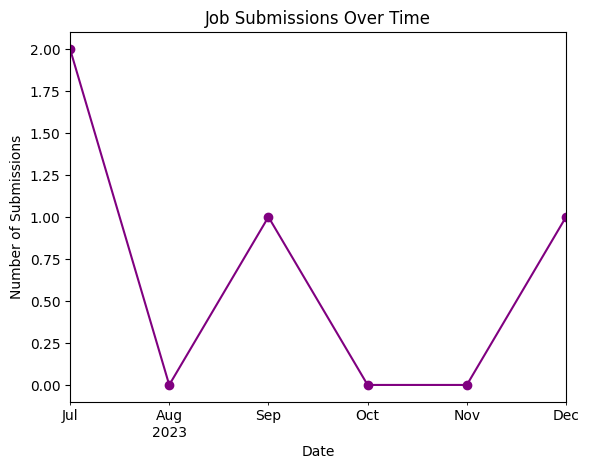

In [13]:
df_jobs['Submission Date'] = pd.to_datetime(df_jobs['Submission Date'])
df_jobs.set_index('Submission Date').resample('M').size().plot(kind='line', marker='o', color='purple')
plt.title('Job Submissions Over Time')
plt.ylabel('Number of Submissions')
plt.xlabel('Date')
plt.show()

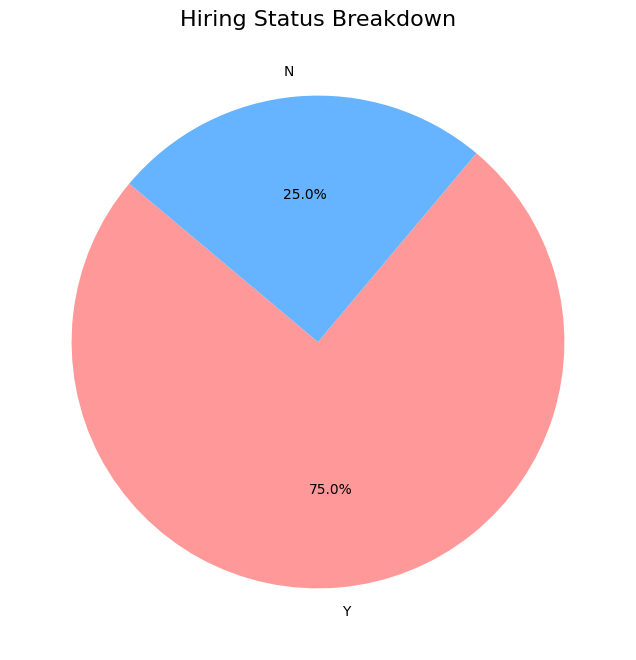

In [14]:
hiring_status_counts = df_jobs['Hired'].value_counts()

# Create a pie chart for hiring status
plt.figure(figsize=(8, 8))
plt.pie(hiring_status_counts, labels=hiring_status_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Hiring Status Breakdown', fontsize=16)
plt.show()

# **SQL QUERIES**

In [15]:
!pip install pandasql


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=253e5636708d70e072fb614fc03b607a0dacc0f5c9025c0f2b62865fa8f1e891
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [19]:
query = """
SELECT
    "Job Location",
    AVG(CAST("Salary ($1000)" AS FLOAT)) AS avg_salary
FROM
    df_jobs
GROUP BY
    "Job Location"
ORDER BY
    avg_salary DESC;
    """

result = ps.sqldf(query, locals())
result.head()

,Job Location,avg_salary
0,"Chicago, IL",185.0
1,"San Jose, CA",145.0
2,"Trenton, NJ",120.0


In [20]:
query = """
SELECT
    "Visa",
    COUNT("Consultant Name") AS consultant_count
FROM
    df_jobs
GROUP BY
    "Visa"
ORDER BY
    consultant_count DESC;
    """

result = ps.sqldf(query, locals())
result.head()

,Visa,consultant_count
0,US Citizen,4


In [21]:
query = """
SELECT
    "Consultant Name",
    "Job Title",
    "Salary ($1000)"
FROM
    df_jobs
WHERE
    "Relocation" = 'Yes';
    """

result = ps.sqldf(query, locals())
result.head()

,Consultant Name,Job Title,Salary ($1000)
0,Roberta M. Livingston,ios developer,185.0


In [27]:
df_jobs['Hired'] = df_jobs['Hired'].str.strip().str.lower()

In [35]:
query = """
SELECT
    "Job Title",
    COUNT("Hired") AS hired_count
FROM
    df_jobs
WHERE
    "Hired" = 'y'
GROUP BY
    "Job Title"
ORDER BY
    hired_count DESC;
    """

result = ps.sqldf(query, locals())
result.head()

,Job Title,hired_count
0,python,1
1,ios developer,1
2,cloud engineer,1


In [34]:
query = """
SELECT
    "Consultant Name",
    "Job Title",
    "Submission Date",
    "Joining Date"
FROM
    df_jobs
WHERE
    "Submission Date" BETWEEN '2023-07-12' AND '2023-12-14'
AND
    "Hired" = 'y';
    """

result = ps.sqldf(query, locals())
result.head()

,Consultant Name,Job Title,Submission Date,Joining Date
0,Roberta M. Livingston,cloud engineer,2023-07-27 00:00:00.000000,2023-08-23 00:00:00.000000
1,Roberta M. Livingston,ios developer,2023-07-12 00:00:00.000000,2023-05-08 00:00:00.000000


# **Challenges Faced**

Data Quality: Addressed missing values, handled formatting issues, and filled gaps using averages or common values.

Large Dataset: Used SQL queries to filter relevant data and avoid loading unnecessary information into Python.

# **Future Steps:**

Predictive Models: Use machine learning (e.g., Linear Regression) to predict job demand

Automation: Create Python scripts that automatically pull and analyze updated data to maintain real-time insights.